# Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# Thu thập dữ liệu

## Dữ liệu của bạn là về chủ đề gì và bạn lấy từ nguồn nào?

##  Người ta có cho phép bạn dùng dữ liệu như này không?
Ví dụ, bạn có thể xem thử license của dữ liệu là gì

##  Người ta thu thập dữ liệu như thế nào?

# Khám phá dữ liệu & tiền xử lý dữ liệu

In [4]:
movies_df = pd.read_csv('./data/IMDb movies.csv')
movies_df.head(2)

/home/nam/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [5]:
ratings_df = pd.read_csv('./data/IMDb ratings.csv')
movies_df.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?
Dữ liệu về phim trong movies_df có 85855 dòng và 22 cột  
Dữ liệu điểm bình chọn trong ratings_df có 85855 dòng và 49 cột  

In [6]:
movies_df.shape

(85855, 22)

In [7]:
ratings_df.shape

(85855, 49)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
Mỗi dòng trong movies_df là thông tin của một bộ phim trên trang IMDb  
Mỗi dòng trong ratings_df là điểm đánh giá chi tiết của một bộ phim trên trang IMDb  

## Dữ liệu có các dòng bị lặp không?
Dữ liệu về phim không có các dòng bị lặp  
Dữ liệu điểm bình chọn không có các dòng bị lặp

In [8]:
ratings_df.duplicated().any()

False

In [9]:
movies_df.duplicated().any()

False

## Mỗi cột có ý nghĩa gì?

### ratings_df

1. imdb_title_id: mã định danh của tựa đề phim
2. weighted_average_vote: điểm sau khi tính theo trung bình trọng số
3. total_votes: số lượng bình chọn
4. mean_vote: điểm bình chọn trung bình
5. median_vote: điểm bình chọn trung vị
6. votes_10: số lượng bình chọn điểm 10
7. votes_9: số lượng bình chọn điểm 9
8. votes_8: số lượng bình chọn điểm 8
9. votes_7: số lượng bình chọn điểm 7
10. votes_6: số lượng bình chọn điểm 6
11. votes_5: số lượng bình chọn điểm 5
12. votes_4: số lượng bình chọn điểm 4
13. votes_3: số lượng bình chọn điểm 3
14. votes_2: số lượng bình chọn điểm 2
15. votes_1: số lượng bình chọn điểm 1
16. allgenders_0age_avg_vote: điểm bình chọn trung bình của tất cả người dùng dưới 18 tuổi
17. allgenders_0age_votes: số lượng bình chọn của người dùng dưới 18 tuổi
18. allgenders_18age_avg_vote: điểm bình chọn trung bình của tất cả người dùng 18-30 tuổi
19. allgenders_18age_votes: số lượng bình chọn của người dùng 18-30 tuổi
20. allgenders_30age_avg_vote: điểm bình chọn trung bình của tất cả người dùng 30-45 tuổi
21. allgenders_30age_votes: số lượng bình chọn của người dùng 30-45 tuổi
22. allgenders_45age_avg_vote: điểm bình chọn trung bình của tất cả người dùng trên 45 tuổi
23. allgenders_45age_votes: số lượng bình chọn của người dùng trên 45 tuổi
24. males_allages_avg_vote: điểm bình chọn trung bình của tất cả người dùng nam
25. males_allages_votes: số lượng bình chọn của tất cả người dùng nam
26. males_0age_avg_vote: điểm bình chọn trung bình của tất cả người dùng nam dưới 18 tuổi
27. males_0age_votes: số lượng bình chọn của tất cả người dùng nam dưới 18 tuổi
28. males_18age_avg_vote: điểm bình chọn trung bình của tất cả người dùng nam 18-30 tuổi
29. males_18age_votes: số lượng bình chọn của tất cả người dùng nam 18-30 tuổi
30. males_30age_avg_vote: điểm bình chọn trung bình của tất cả người dùng nam 30-45 tuổi
31. males_30age_votes: số lượng bình chọn của tất cả người dùng nam 30-45 tuổi
32. males_45age_avg_vote: điểm bình chọn trung bình của tất cả người dùng nam trên 45 tuổi
33. males_45age_votes: số lượng bình chọn của tất cả người dùng nam trên 45 tuổi
34. females_allages_avg_vote: điểm bình chọn trung bình của tất cả người dùng nữ
35. females_allages_votes: số lượng bình chọn của tất cả người dùng nữ
36. females_0age_avg_vote: điểm bình chọn trung bình của tất cả người dùng nam dưới 18 tuổi
37. females_0age_votes: số lượng bình chọn của tất cả người dùng nam dưới 18 tuổi
38. females_18age_avg_vote: điểm bình chọn trung bình của tất cả người dùng nam 18-30 tuổi
39. females_18age_votes: số lượng bình chọn của tất cả người dùng nam 18-30 tuổi
40. females_30age_avg_vote: điểm bình chọn trung bình của tất cả người dùng nam 30-45 tuổi
41. females_30age_votes: số lượng bình chọn của tất cả người dùng nam 30-45 tuổi
42. females_45age_avg_vote: điểm bình chọn trung bình của tất cả người dùng nam trên 45 tuổi
43. females_45age_votes: số lượng bình chọn của tất cả người dùng nam trên 45 tuổi
44. top1000_voters_rating
45. top1000_voters_votes
46. us_voters_rating: điểm bình chọn trung bình của những người dùng từ Mỹ
47. us_voters_votes: số lượng bình chọn của những người dùng từ Mỹ
48. non_us_voters_rating: điểm bình chọn trung bình của những người dùng không đến từ Mỹ
49. non_us_voters_votes: số lượng bình chọn của những người dùng không đến từ Mỹ

### movies_df

| Tên cột | Ý nghĩa của cột | 
|:---------|:-----------------|
| ***imdb_title_id*** | ID phim trên trang IMDb |
| ***title*** | tên phim |
| ***original_title*** | tên gốc của phim |
| ***year*** | năm phát hành (4 chữ số) |
| ***date_published*** | ngày phát hành |
| ***genre*** | thể loại phim (1 phim có thể thuộc nhiều thể loại) |
| ***duration*** | thời lượng phim (phút)|
| ***country*** | quốc gia của phim |
| ***language*** | ngôn ngữ sử dụng trong phim |
| ***director*** | tên đạo diễn |
| ***writer*** | tên biên kịch |
| ***production_company*** | tên công ty sản xuất |
| ***actors*** | diễn viên |
| ***description*** | mô tả phim |
| ***avg_vote*** | điểm đánh giá trung bình (thang 10) |
| ***votes*** | số lượng đánh giá |
| ***budget*** | kinh phí làm phim (đơn vị tiền tệ không đồng nhất) |
| ***usa_gross_income*** | tổng doanh thu tại Mỹ (đô la Mỹ) |
| ***worlwide_gross_income*** | tổng doanh thu trên toàn thế giới (đô la Mỹ) |
| ***metascore*** $^{(*)}$ | đánh giá của những người có chuyên môn (thang 100) |
| ***reviews_from_users*** | số lượng review từ người dùng |
| ***reviews_from_critics*** | số lượng review từ nhà phê bình |

(\*): ***metascore*** lấy từ trang https://www.metacritic.com/, 2 cột ***reviews_from_users*** và ***reviews_from_critics*** sẽ ứng với các review trên trang này

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [ ]:
movies_df.dtypes

**Dựa vào mô tả thì có các cột cần có sự điều chỉnh về kiểu dữ liệu:**
- Các cột ***year, budget, usa_gross_income, worlwide_gross_income*** nên được đưa về các kiểu `numeric`.
- Cột ***date_published*** cần được đưa về kiểu `datetime`

In [7]:
ratings_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

Cột imdb_title_id đang ở dạng object, các phần tử đều ở dạng chuỗi dạng chuỗi nên không cần xử lý  
Các cột số lượng đang ở kiểu số thực float64, đúng hơn là nên ở dạng số nguyên int. Nhưng đây là do dữ liệu của tác giả để kiểu số thực, việc ép kiểu về số nguyên có thể gây mất mát dữ liệu. Đó các cột: allgenders_18age_votes, allgenders_30age_votes, allgenders_45age_votes, males_allages_votes, males_18age_votes, males_30age_votes, males_45age_votes, females_allages_votes, females_18age_votes, females_30age_votes, females_45age_votes, us_voters_votes, non_us_voters_votes. 

## Số-lượng/tỉ-lệ các giá trị thiếu?

- Vì nhìn qua thì có các cột bị thiếu rất nhiều nên cần kiểm tra để loại bỏ nếu không thực sự cần thiết

In [ ]:
def missing_ratio(s):
    return s.isnull().mean() * 100

ratings_df.agg(missing_ratio)

In [ ]:
movies_df.agg(missing_ratio)

## Tiền xử lý bỏ cột có giá trị thiếu nhiều và bỏ cột chúng tôi không hiểu rõ ý nghĩa
### ratings_df
- Bỏ cột có giá trị thiếu nhiều: allgenders_0age_avg_vote, allgenders_0age_votes, males_0age_avg_vote, males_0age_votes, females_0age_avg_vote, females_0age_votes
- Bỏ cột chúng tôi không hiểu rõ ý nghĩa: top1000_voters_rating, top1000_voters_votes

### movies_df
- Bỏ đi các cột thiếu hơn 50% dữ liệu: ***budget, usa_gross_income, worlwide_gross_income, metascore***
- Do bỏ cột ***metascore*** nên sẽ bỏ luôn hai cột bổ sung thông tin cho cột này là: ***reviews_from_users, reviews_from_critics***

In [15]:
ratings_df.drop(columns=['allgenders_0age_avg_vote', 
                         'allgenders_0age_votes', 
                         'males_0age_avg_vote', 
                         'males_0age_votes', 
                         'females_0age_avg_vote', 
                         'females_0age_votes', 
                         'top1000_voters_rating', 
                         'top1000_voters_votes'], inplace=True)

In [8]:
movies_df = movies_df.drop(columns=['budget', 
                                    'usa_gross_income', 
                                    'worlwide_gross_income', 
                                    'metascore', 
                                    'reviews_from_users', 
                                    'reviews_from_critics'])

### Điều chỉnh kiểu dữ liệu cho phù hợp cho các cột

- Do đã bỏ đi một số cột nên còn lại 2 cột ***year*** và ***date_published*** là cần điều chỉnh

**Điều chỉnh cột year:**
- Có một warning khi đọc dữ liệu là cột ***year*** có kiểu dữ liệu hỗn hợp nên trước tiên sẽ là kiểm tra xem cột ***year*** có các kiểu dữ liệu gì

In [9]:
set(movies_df.year.apply(type))

{int, str}

- Ngoài kiểu `int` là hợp lý ***year*** thì còn kiểu `str` cần phải chỉnh sửa, sao khi thử chuyển thì báo lỗi

`Unable to parse string "TV Movie 2019" at position 83917`

- Nên xóa dòng mà cột ***year*** nhận giá trị "TV Movie 2019" rồi mới chuyển về dạng `numeric`

In [10]:
movies_df = movies_df[movies_df.date_published != 'TV Movie 2019']
movies_df.year = pd.to_numeric(movies_df.year)
movies_df.year.dtypes

dtype('int64')

**Điều chỉnh cột *date_published* về dạng `datetime`**

- Trước khi điều chỉnh kiểu dữ liệu thì có một vấn đề cần xử lý với cột ***date_published*** đó là có các giá trị chỉ có năm không có ngày tháng 

In [11]:
movies_df.date_published[movies_df.date_published.apply(lambda x: '-' not in str(x))].head()

5      1913
55     1915
100    1919
117    1919
144    1922
Name: date_published, dtype: object

- Bỏ các cột này trước khi chuyển về dạng `datetime`, mặc dù không bỏ thì việc chuyển vẫn không có vấn đề tuy nhiên ngày tháng sẽ mặc định là 1/1 điều này sẽ gây sai lệch nếu ta muốn khảo sát mà có sử dụng cột này.

In [12]:
movies_df = movies_df[movies_df.date_published.apply(lambda x: '-' in str(x))]

- Chuyển cột ***date_published*** về dạng `datetime`

In [13]:
movies_df.date_published = pd.to_datetime(movies_df.date_published, format='%Y-%m-%d')

In [14]:
movies_df.date_published.dtypes

dtype('<M8[ns]')

- Theo mô tả dữ liệu thì cột ***year*** phải trùng với năm ở cột ***date_published***, kiểm tra thực điều này có thực sự đúng

In [15]:
sum(movies_df.year != movies_df.date_published.dt.year)

17054

*Sai lệch rất nhiều,không biết vì sao lại có sự sai lệch này. Với sự sai lệch nhiều đến vậy thì có lẽ không phải do vấn đề nhập liệu*

- Vậy sẽ xóa cột ***year***

In [16]:
movies_df = movies_df.drop(columns=['year'])

### Xem lại dữ liệu sau khi đã điều chỉnh

**Số dòng số cột của dữ liệu**

In [17]:
movies_df.shape

(81292, 15)

In [ ]:
ratings_df.shape

**Xem lại kiểu dữ liệu của các cột**

In [18]:
movies_df.dtypes

imdb_title_id                 object
title                         object
original_title                object
date_published        datetime64[ns]
genre                         object
duration                       int64
country                       object
language                      object
director                      object
writer                        object
production_company            object
actors                        object
description                   object
avg_vote                     float64
votes                          int64
dtype: object

In [ ]:
ratings_df.dtypes

## Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

In [ ]:
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.unique()

### movies_df
#### Xem xét các giá trị min max và tỷ lệ giá trị thiếu của các cột dạng numeric

In [19]:
num_cols = ['date_published', 'duration', 'avg_vote', 'votes']
movies_df[num_cols].agg([min, max, missing_ratio])

,date_published,duration,avg_vote,votes
min,1894-10-09 00:00:00,41.0,1.0,99.0
max,2021-05-07 00:00:00,808.0,9.9,2278845.0
missing_ratio,0.0,0.0,0.0,0.0


In [19]:
num_cols = ['date_published', 'duration', 'avg_vote', 'votes']
movies_df[num_cols].agg([min, max, missing_ratio])

,date_published,duration,avg_vote,votes
min,1894-10-09 00:00:00,41.0,1.0,99.0
max,2021-05-07 00:00:00,808.0,9.9,2278845.0
missing_ratio,0.0,0.0,0.0,0.0


- Các cột dạng numeric không có dữ liệu thiếu
- Tiếp theo sẽ xem thử sự phân bố giá trị của các cột này, cột ***date_published*** là kiểu `datetime` nên ta không xem xét sự phân bố dữ liệu

**Phân bố giá trị của cột year**

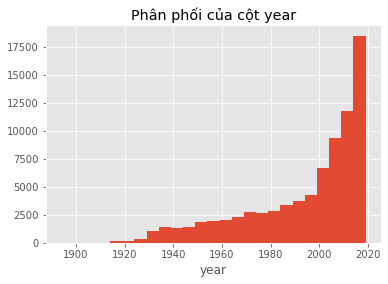

In [20]:
movies_df['date_published'].dt.year.hist(bins=np.arange(1894, 2022, 5))
plt.xlabel('year')
plt.title('Phân phối của cột year')
plt.show()

*Nhận xét: số lượng phim luôn tăng qua các năm và có xu hướng tăng mạnh hơn qua từng năm. Và năm 2021 tất nhiên sẽ có rất ít phim*

**Phân bố giá trị của cột duration**

Các giá trị trên 200 là quá ít nên bin cuối là 200

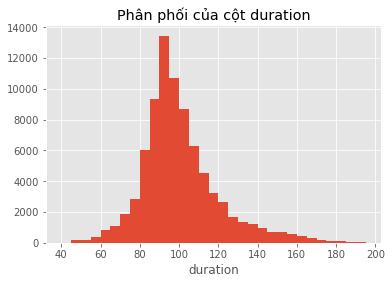

In [21]:
movies_df['duration'].hist(bins=np.arange(40, 200, 5))
plt.xlabel('duration')
plt.title('Phân phối của cột duration')
plt.show()

*Nhận xét: thời lượng các bộ phim chủ yếu trong khoảng từ 80-120 phút*

**Phân bố giá trị của cột avg_vote**

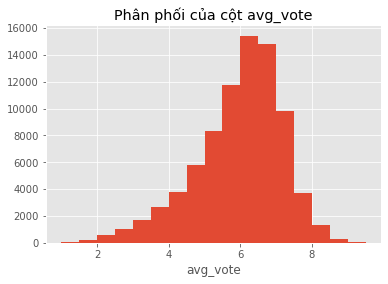

In [22]:
movies_df['avg_vote'].hist(bins=np.arange(1, 10, 0.5))
plt.xlabel('avg_vote')
plt.title('Phân phối của cột avg_vote')
plt.show()

*Nhận xét: đa số các phim được đánh giá ở mức 5-7, rất ít phim có thể đạt được 9-10 (không có phim nào đạt được đánh gái 10 tuyệt đối)*

**Phân bố giá trị của cột votes**

Các giá trị trên 6000 là quá ít nên bin cuối là 6000

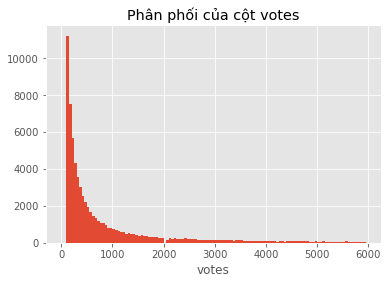

In [23]:
movies_df['votes'].hist(bins=np.arange(0, 6000, 50))
plt.xlabel('votes')
plt.title('Phân phối của cột votes')
plt.show()

In [32]:
ratings_df[ratings_df.columns[1:]].describe()

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,85855.000000,8.585500e+04,85855.000000,85855.000000,8.585500e+04,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85149.000000,85149.000000,85845.000000,85845.000000,85775.000000,85775.000000,85854.000000,8.585400e+04,84390.000000,84390.000000,85843.000000,85843.000000,85754.000000,85754.000000,85774.000000,85774.000000,79334.000000,79334.000000,84911.000000,84911.000000,83057.000000,83057.000000,85646.000000,85646.000000,85854.000000,85854.000000
mean,5.898656,9.493490e+03,6.226342,6.267853,1.216158e+03,1196.774608,2040.896337,2105.668371,1353.192802,700.291177,340.179628,192.263409,126.663852,221.401479,6.011314,1778.370809,5.862917,4053.927124,5.678195,1260.706803,5.817172,6.029016e+03,5.946389,1343.226970,5.817767,3324.669338,5.630150,1051.196877,6.039408,1366.759461,6.321509,445.072340,6.071223,685.655451,6.022226,196.065341,5.925910,1647.822537,5.749638,4332.940865
std,1.234987,5.357436e+04,1.155280,1.481168,1.245582e+04,11735.363316,13801.122865,10699.375191,5976.801303,2931.301270,1415.815848,814.505546,551.690563,1172.132946,1.439783,11798.156167,1.279443,22087.819201,1.250633,5363.599259,1.248058,3.364652e+04,1.464165,9119.273345,1.289268,18348.499984,1.264053,4473.652738,1.346245,7672.675428,1.738922,2830.024831,1.454370,3732.376186,1.541895,842.979585,1.308087,8455.978158,1.285570,23243.807279
min,1.000000,9.900000e+01,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.200000,2.050000e+02,5.600000,6.000000,2.100000e+01,8.000000,18.000000,28.000000,30.000000,22.000000,12.000000,7.000000,5.000000,10.000000,5.300000,13.000000,5.100000,69.000000,5.000000,53.000000,5.100000,1.320000e+02,5.100000,9.000000,5.100000,56.000000,4.900000,45.000000,5.300000,22.000000,5.500000,4.000000,5.300000,10.000000,5.200000,6.000000,5.200000,24.000000,5.000000,95.000000
50%,6.100000,4.840000e+02,6.400000,6.000000,5.100000e+01,24.000000,49.000000,77.000000,76.000000,53.000000,30.000000,19.000000,14.000000,25.000000,6.200000,43.000000,6.100000,172.000000,5.900000,123.000000,6.000000,3.080000e+02,6.200000,31.000000,6.000000,140.000000,5.900000,104.000000,6.300000,58.000000,6.500000,11.000000,6.300000,27.000000,6.200000,16.000000,6.100000,81.000000,6.000000,225.000000
75%,6.800000,1.766500e+03,7.000000,7.000000,1.920000e+02,111.500000,234.000000,342.000000,290.000000,178.000000,100.000000,63.000000,46.000000,82.000000,7.000000,196.000000,6.800000,679.000000,6.600000,425.000000,6.700000,1.141000e+03,7.000000,145.000000,6.700000,556.000000,6.500000,358.000000,7.000000,227.000000,7.400000,48.000000,7.000000,109.000000,7.000000,62.000000,6.800000,335.000000,6.700000,841.000000
max,9.900000,2.278845e+06,9.800000,10.000000,1.259076e+06,629582.000000,418070.000000,241832.000000,145740.000000,78385.000000,45219.000000,37644.000000,32101.000000,68500.000000,10.000000,522182.000000,10.000000,879620.000000,10.000000,204278.000000,10.000000,1.409165e+06,10.000000,422587.000000,10.000000,743676.000000,

### ratings_df

#### Số-lượng/tỉ-lệ các giá trị thiếu? Min? max?

In [14]:
ratings_df[1:].agg([missing_ratio, min, max])

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.145666,61.145666,0.822326,0.822326,0.011648,0.011648,0.093181,0.093181,0.001165,1.164768e-03,68.073707,68.073707,1.706385,1.706385,0.013977,0.013977,0.117642,0.117642,0.094346,0.094346,74.239989,74.239989,7.595453,7.595453,1.099541,1.099541,3.259021,3.259021,0.790878,0.790878,0.243437,0.243437,0.001165,0.001165
min,tt0000574,1.0,99.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,tt9914942,9.9,2278845.0,9.8,10.0,1259076.0,629582.0,418070.0,241832.0,145740.0,78385.0,45219.0,37644.0,32101.0,68500.0,10.000000,2761.000000,10.000000,522182.000000,10.000000,879620.000000,10.000000,204278.000000,10.000000,1.409165e+06,10.000000,1872.000000,10.000000,422587.000000,10.000000,743676.000000,10.000000,165852.000000,10.000000,278964.000000,10.000000,630.000000,10.000000,107833.000000,10.000000,129249.000000,10.000000,34317.000000,10.000000,928.000000,10.000000,348363.000000,10.000000,887226.000000


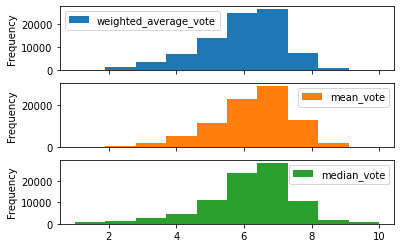

In [54]:
list_col = ['weighted_average_vote', 'mean_vote', 'median_vote']
ratings_df[list_col].plot(kind='hist', subplots=True);

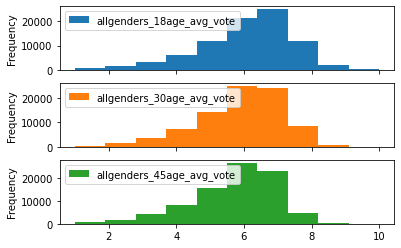

In [55]:
list_col = ['allgenders_18age_avg_vote', 'allgenders_30age_avg_vote', 'allgenders_45age_avg_vote']
ratings_df[list_col].plot(kind='hist', subplots=True);

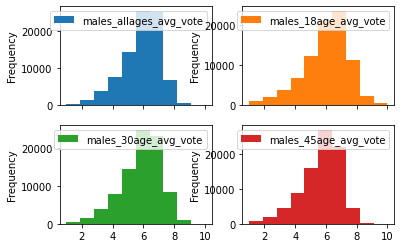

In [53]:
list_col = ['males_allages_avg_vote', 'males_18age_avg_vote', 'males_30age_avg_vote', 'males_45age_avg_vote']
ratings_df[list_col].plot(kind='hist', subplots=True, layout=(2,2));

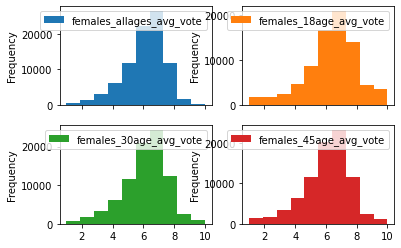

In [56]:
list_col = ['females_allages_avg_vote', 'females_18age_avg_vote', 'females_30age_avg_vote', 'females_45age_avg_vote']
ratings_df[list_col].plot(kind='hist', subplots=True, layout=(2,2));

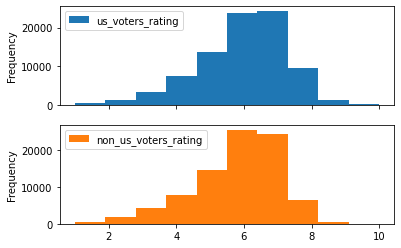

In [58]:
list_col = ['us_voters_rating', 'non_us_voters_rating']
ratings_df[list_col].plot(kind='hist', subplots=True);

## Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?
### ratings_df
- Cột imdb_title_id dạng phân loại nhưng không mang phân bố

In [34]:
ratings_df['imdb_title_id'].describe()

count         85855
unique        85855
top       tt3438252
freq              1
Name: imdb_title_id, dtype: object

### movies_df
- Đầu tiên xem xét các giá trị sau của các cột categorical: tỷ lệ giá trị thiếu, số lượng các giá trị phân biệt (`num_diff_vals`), các gái trị phân biệt (`diff_vals`)

In [24]:
cate_cols = list(set(movies_df.columns) - set(num_cols))
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.unique()

movies_df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])

,original_title,actors,genre,production_company,country,language,imdb_title_id,director,writer,description,title
missing_ratio,0.0,0.072578,0.0,4.542882,0.071348,0.943512,0.0,0.098411,1.631157,2.30527,0.0
num_diff_vals,76680,81179,1234,30598,4826,4299,81292,33272,63954,79296,77845
diff_vals,"[Miss Jerry, The Story of the Kelly Gang, Den ...","[Blanche Bayliss, William Courtenay, Chauncey ...","[Romance, Biography, Crime, Drama, Drama, Dram...","[Alexander Black Photoplays, J. and N. Tait, F...","[USA, Australia, Germany, Denmark, Italy, Germ...","[None, nan, English, Italian, German, Danish, ...","[tt0000009, tt0000574, tt0001892, tt0002101, t...","[Alexander Black, Charles Tait, Urban Gad, Cha...","[Alexander Black, Charles Tait, Urban Gad, Geb...",[The adventures of a female reporter in the 18...,"[Miss Jerry, The Story of the Kelly Gang, Den ..."


*Cột imdb_title_id có số lượng giá trị khác nhau đúng với số dòng dữ liệu: 85854 dòng*

- Tiếp theo tìm các giá trị xuất hiện nhiều nhất của các cột ***genre, production_company, country, language, actors, director, writer***.
- Do mỗi mẫu của các cột này có thể có nhiều giá trị nên cần phải xử lý tách các giá trị này ra trước rồi mới tính tần xuất của từng giá trị. Hàm `count_list_cols` sẽ thực hiện việc tách và sau đó tính tần xuất bằng phương thức `value_counts`

In [25]:
def count_list_cols(s):
    return s.str.replace(' ', '').str.split(',').explode().value_counts()
def top_vals(s, n):
    freq = count_list_cols(s)
    return list(freq[:n].index)

movies_df[['genre', 'production_company', 'country', 'language', 'actors', 'director', 'writer']].agg(lambda s: top_vals(s, 5))

,genre,production_company,country,language,actors,director,writer
0,Drama,Metro-Goldwyn-Mayer(MGM),USA,English,Brahmanandam,MichaelCurtiz,JingWong
1,Comedy,WarnerBros.,France,French,AnupamKher,JesúsFranco,KuangNi
2,Romance,ColumbiaPictures,UK,Spanish,EricRoberts,LesleySelander,WilliamShakespeare
3,Action,ParamountPictures,India,Italian,Nassar,RichardThorpe,JesúsFranco
4,Thriller,TwentiethCenturyFox,Italy,German,PrakashRaj,JohnFord,RobinBhatt


- Trực quan tần xuất của các giá trị xuất hiện nhiều nhất của các cột ***genre, production_company, country, language***

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột genre**

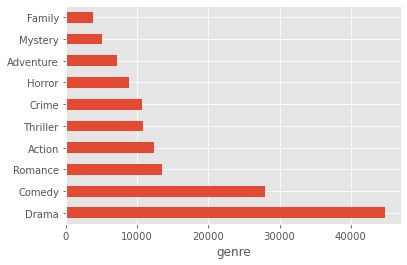

In [26]:
count_list_cols(movies_df.genre)[:10].plot.barh()
plt.xlabel('genre')
plt.show()

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột production_company**

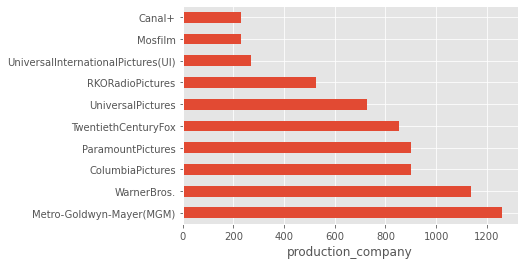

In [27]:
count_list_cols(movies_df.production_company)[:10].plot.barh()
plt.xlabel('production_company')
plt.show()

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột country**

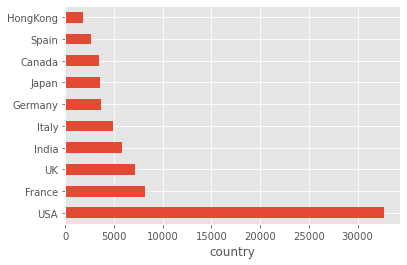

In [28]:
count_list_cols(movies_df.country)[:10].plot.barh()
plt.xlabel('country')
plt.show()

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột genre**

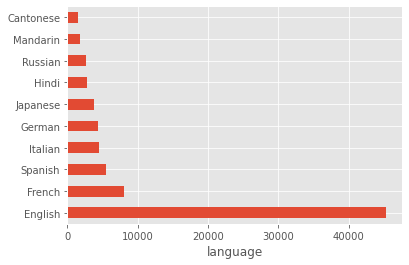

In [29]:
count_list_cols(movies_df.language)[:10].plot.barh()
plt.xlabel('language')
plt.show()

*Tần xuất của giá trị **USA** trong cột **country** và **English** trong cột **languge** vượt trội hoàn toàn so với các giá trị còn lại, điều này không quá bất ngờ đối với ngành công nghiệp phim ảnh*

- Xem thử với các phim tiếng Anh (không cần xét USA vì phim ở USA sẽ bao gồm trong phim tiếng Anh) thì các giá trị xuất hiện nhiều nhất của các cột ***actors, director, writer*** sẽ như thế nào.
- Tạo `Eng_df` gồm các phim tiếng Anh (có thể có các thứ tiếng khác) để sử dụng cho các phần sau

In [30]:
Eng_df = movies_df[movies_df.language.apply(lambda x: 'English' in str(x))]

In [31]:
Eng_df[['actors', 'director', 'writer']].agg(lambda s: top_vals(s, 5))

,actors,director,writer
0,EricRoberts,MichaelCurtiz,WilliamShakespeare
1,JohnCarradine,LesleySelander,RobertE.Kent
2,HenryO'Neill,RichardThorpe,BenHecht
3,MichaelMadsen,WilliamBeaudine,WoodyAllen
4,JohnWayne,JohnFord,StephenKing


*Các phim tiếng Anh mặt dù chiếm đa số nhưng không vì vậy mà các giá trị **actors, director, writer** của các phim tiếng Anh sẽ chiếm đa số theo*

---

# Xác định các câu hỏi

## Câu hỏi là gì?
Đạo diễn nào có nhiều phim rating cao nhất
## Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?
Dựa vào đó để xem được nhiều phim hay từ đạo diễn này hơn

# Phân tích để trả lời

# Nhìn lại quá trình làm đồ án

# Tài liệu tham khảo